# Linear Regression
In this notebook, we will be using linear regression to predict the prices of houses in a given market. Linear regression is a statistical method that allows us to model the linear relationship between a dependent variable (in this case, house prices) and one or more independent variables (such as size of the house, number of bedrooms, location, etc.). By fitting a linear regression model to a dataset of housing prices and their corresponding features, we can use the model to make predictions on the prices of new houses based on their features.

We will begin by discussing the theory behind linear regression and how it can be implemented in Python using the scikit-learn library. Then, we will apply these concepts to a real-world dataset of weather history and use the model to make predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

I will now open a dataset that contains information about the real estate market

In [2]:
df=pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Understanding the data
Here I will find multiple descriptions of the data such as the shape, info, and description

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


From here we can see the shape is (96453, 12) with no null values

## Visualizing the Data
We will now use matplotlib and seaborn together in order to visualize the dataset, making it easier to work with.  For now we will only look at the numerical columns since these will be more useful for simple linear regression.  We will also ignore the "Loud coverage" column since all terms are 0.

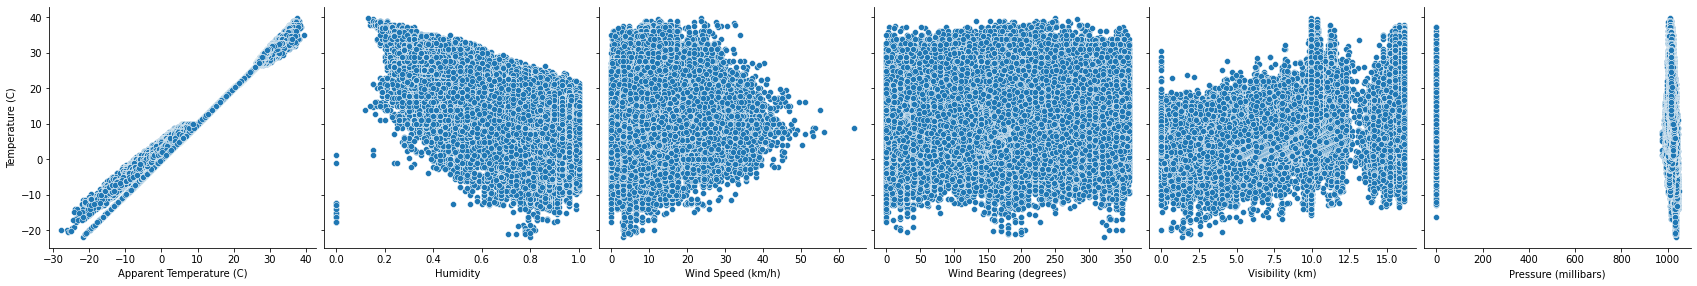

In [4]:
sns.pairplot(df, x_vars=['Apparent Temperature (C)','Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                         'Visibility (km)', 'Pressure (millibars)'], 
             y_vars='Temperature (C)', height=4, aspect=1, kind='scatter')
plt.show()

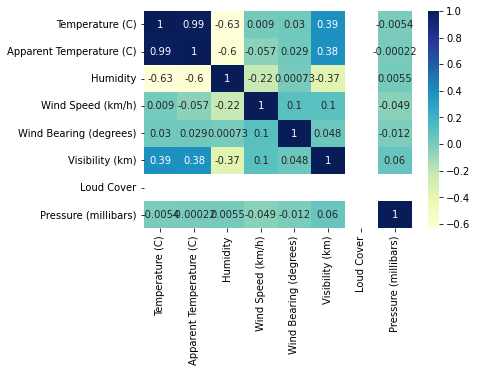

In [5]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot = True)
plt.show()

As we can see in the heatmap above, if Temperature is our dependent variable after ifnoring the apparent temperature column, humidity and temperature have the strongest correlation.  As a result, we will only be looking at these columns for simple linear regression since we can only choose one independent variable.  This will result in the most accurate model possible for simple linear regression.

## Overview of Simple Linear Regression
The general equation for simple linear regression is ```y = mx + b```.  In this case I will use the distance to the nearest MRT station as the x value since it had the highest correlation and make house price the y variable.  The new equation can be written as ```price = m * distance + b```.  The m represents the slope of the linear model while the b represents the y-intercept.  We will now create a structure for our x-values and y-values.

In [6]:
X = df['Humidity']
y = df['Temperature (C)']

We now have to split our data into a test set and a train set.  The purpose of splitting up the data in this way is to avoid overfitting.  This occurs when we train our model to work very well on the specific data that it was trained on but the model is not very accurate when we introduce new data.  In order to avoid this issue we will take 30% of the data in order to train our model and we will evaluate it on the remaining 70% to get an idea of the accuracy.  This also avoids testing our model on data that it has already seen before.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=100)

In [8]:
X_train

63699    0.77
61806    0.95
47902    0.93
27236    0.44
5526     0.86
         ... 
65615    0.79
77655    0.96
79683    0.81
56088    0.77
38408    0.69
Name: Humidity, Length: 67517, dtype: float64

In [9]:
y_train

63699     3.750000
61806     8.777778
47902    15.533333
27236    25.088889
5526      5.100000
           ...    
65615    18.861111
77655    12.800000
79683    17.205556
56088   -10.000000
38408    -7.377778
Name: Temperature (C), Length: 67517, dtype: float64

From here we can use the statsmodel package in statsmodel.api to begin building our model for the data.  The library assumes that the y-intercept of the data will be zero so we have to add an add_constant attribute manually since we can't assume (0,0) as a point.

In [10]:
X_train_sm = sm.add_constant(X_train)

Now that we have set up the y-intercept to be mutable we can start building our model using the OLS (Ordinary Least Square) method that exists in the statsmodel package. This method works by finding the error of each iteration by using the following formula:
$\sum_{i=0}^{k}{\beta_ix_ni + \epsilon_n}$ and continuously iterating while slightly changing the coefficient values, trying to minimize the error found

In [11]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const       34.680058
Humidity   -30.969773
dtype: float64

We now have the values for y-intercept and slope that our model calculated, 34.680058 and -30.969773 respectufully.  Now we will look at the summary of the data to get a better idea as to how closely fit our model is.

In [12]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 4.506e+04
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:15:37   Log-Likelihood:            -2.3100e+05
No. Observations:               67517   AIC:                         4.620e+05
Df Residuals:                   67515   BIC:                         4.620e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6801      0.111    312.381      0.000      34.462      34.898
Humidity     -30.9698      0.146   -212.264      0.000     -31.256     -30.684
==============================================================================
Omnibus:                     1578.345   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1690.475
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       3.100   Cond. No.                         7.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For simple linear regression the most important values in this table are the R-squared value, F-statistic, and p-values.  The R-squared value of .400 means that 40% of the variance in temperature in our training set can be attributed to temperature changes.  The higher the R-squared value, the more influential the independent variable is on the outcome of the dependent variable.  Since this value is relatively far from 1 we know that our model will not be incredibly accurate since there are a lot more variables that can affect temperature other than humidity.  Later on we will discuss how multiple independent variables can be used in order to improve this.  The next important value in the table is the F-statistic.  Since the p-value of the F-statistic is 0 (or close enough to be rounded to 0) this means that the model fit is statistically significant.  Lastly, we can look at the p-values for each individual coefficient to ensure these are statistically significant as well.  As we can see in the table under the P>|t| column, both coefficients have a p-value that is very close to 0 and therefore these coefficients are statistically significant.  We can now state that the equation for our model is ```Temperature = 34.680058 + -30.969773 * Humidity``` which I will now visualize.

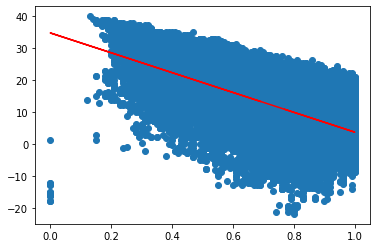

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 34.680058 - 30.969773*X_train, 'r')
plt.show()

Now that we have built and trained the model we can begin to evaluate its accuracy.  This is done through a process called residual analysis.  Before we can begin we have to ensure that our error is normally distributed since this is a core assumption of a linear regression model.  The equation for error is as follows: ```Error = Actual y value - y predicted value```.  We will now test our model against the test set in order to find the residuals (terms that were not predicted correctly) to determine the error for each.

In [14]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

I will plot the residuals on a histogram to better visualize the error values.  We need this distribution to look relatively normal centered around zero in order to claim that our model accurately describes the data.  This follows relatively intuitively because we want most of the data to have a very small error and few data points to have a very large amount of error.  If we find that the distribution is not normal then we would have to try using a different model for the data.

<Figure size 432x288 with 0 Axes>

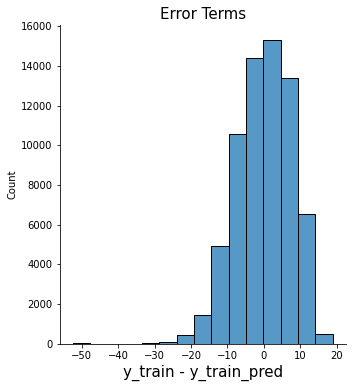

In [28]:
fig = plt.figure()
sns.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

Although the data is skewed slightly to the left this distribution is close enough to being normal that we can move on to the next step.  Now, we have to plot the residuals on a scatter plot to ensure that there isn't an obvious pattern within the locations of the residuals.

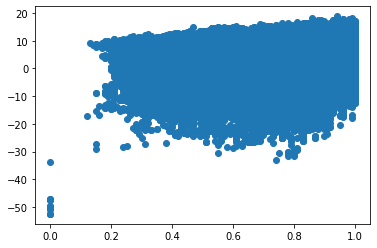

In [16]:
plt.scatter(X_train,res)
plt.show()

Since the scatter plot looks like it is pretty randomly distributed we know we can use simple linear regression to get an accurate model that can be applied to unknown data.  We can now begin making predictions about the test set based on our newly fitted model.  Once again we will have to add a constant to the test data and then use the predict attribute present in statsmodel to predict the y-values.

In [17]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
y_test_pred

48732    11.143030
20867    15.788496
87385     4.949076
21561     4.949076
30624    12.691519
           ...    
60413     7.116960
32406    12.072124
80574     4.019983
18029    10.213937
992       6.187867
Length: 28936, dtype: float64

We can now calculate the r-squared value for our prediction.  There is a built in method to calculate this in the sklearn.metrics package.

In [18]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.3985176357778749

Since our calculated r-squared value is within 5% of the r-squared value we found for our training set we cam conclude that the model is stable and can be applied to future unseen values.  We will now plot our prediction to see what the test data looks like with our line of best fit drawn in.

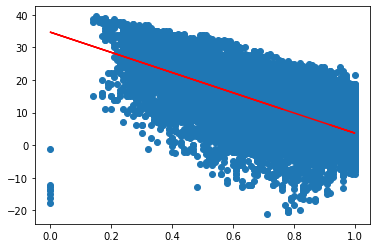

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

A very similar process can be done without using the statsmodel package.  I will now demonstrate how to use the linear_model library from sklearn to achience the same goal.  We will begin by splitting the data into separate train and test sets again.

In [20]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

Now we will add a new column to each set so we have a place to store predicted values.  The original shape of the X_train is (67517, ) but we will make it (67517, 1) and will make X_test go from (28936, ) to (28936, 1)

In [21]:
X_train_lm.shape

X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(67517, 1)
(28936, 1)


Now we will fit the line to the plot using the LinearRegression library that is present in sklearn.linear_model

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train_lm, y_train_lm)

LinearRegression()

Once again we will have to find the coefficients of the model.

In [23]:
print("Intercept :",lm.intercept_)

print('Slope :',lm.coef_)

Intercept : 34.6800578531791
Slope : [-30.96977301]


We now have the values for the intercept and slopes of our model, these numbers should look very familiar.  Our new equation is ```Temperature = 34.6800578531791 - 30.96977301 * Humidty```.  We can now begin making predictions and evaluating the model in the same way as before.

In [24]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.4002450298633454
0.39851763577787525


Since the r-squared values are within 5% of each other we can conclude that this model can be extrapolated and used on unseen data.  Is there any way that we can make this model even more accurate though?  Since our original dataset has many columns that we ignored for simple linear regression we can now use these to improve the accuracy of our model.  This is called multiple linear regression and is very  similar to simple linear regression, the main difference being the fact that instead of only using one independent variable we can now use multiple.